In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [2]:
# Read the listing datasets from all region in Australia
listing_BR = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Barossa/listings.csv', low_memory=True)
listing_MB = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Melbourne/listings.csv', low_memory=True)
listing_NR = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/NorthernRivers/listings.csv', low_memory=True)
listing_SN = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Sydney/listings.csv', low_memory=True)
listing_TM = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/Tasmania/listings.csv', low_memory=True)
listing_WA = pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/Airbnb/WesternAustralia/listings.csv', low_memory=True)

D:\Users\ivans\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Users\ivans\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Users\ivans\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
import re

In [4]:
#Covert the objects to numerics and None to the means of the non-null variables
def convert_numerics_2(object):
    numerics= object.apply(lambda x : re.sub('[^A-Za-z0-9]+', '', x))
    without_none = numerics
    without_none = without_none[without_none != 'None']
    without_none = without_none.apply(lambda x : float(x))
    numerics= numerics.apply(lambda x : without_none.mean() if x == 'None' else x)
    numerics= numerics.apply(lambda x : float(x))
    numerics= numerics.apply(lambda x : round((x/100), 2))
    return numerics

In [5]:
listing_BR.price=convert_numerics_2(listing_BR.price)
listing_MB.price=convert_numerics_2(listing_MB.price)
listing_NR.price=convert_numerics_2(listing_NR.price)
listing_SN.price=convert_numerics_2(listing_SN.price)
listing_TM.price=convert_numerics_2(listing_TM.price)
listing_WA.price=convert_numerics_2(listing_WA.price)

In [6]:
from ipyleaflet import Map, Heatmap, TileLayer, Marker, Circle

In [7]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


In [8]:
from ipyleaflet import (Map, DrawControl)

### Colour for the Price Map
- Cyan -    AUD 1  - AUD 40
- Blue -    AUD 41 - AUD 80
- Lime -    AUD 81 - AUD 120
- Yellow -  AUD 121 - AUD 160
- Red -     AUD 161 - AUD 200

### Barossa

In [9]:
m1=Map(center=[-34.5333, 138.9500], zoom=10)
mark1 = Marker(location=m1.center)
mark1.visible
m1 += mark1
m1

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-34.5333, 138.95], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-34.5333, 138.95], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [10]:
mark1.interact(opacity=(0.0,1.0,0.01))

Box(children=(FloatSlider(value=1.0, description=u'opacity', max=1.0, step=0.01),))

In [11]:
for i, r in listing_BR[['latitude', 'longitude', 'price']].iterrows():
    c = 'cyan' if r['price'] > 0 and r['price'] <= 40 else 'blue' if r['price'] > 41 and r['price'] <=80 else 'lime' if r['price'] > 81 and r['price'] <=120 else 'yellow' if r['price'] > 121 and r['price'] <=160 else 'red' if r['price'] > 161 and r['price'] <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m1.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [12]:
m7=Map(center=[-34.5333, 138.9500], zoom=10)
mark7 = Marker(location=m7.center)
mark7.visible
m7 += mark7
m7

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-34.5333, 138.95], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-34.5333, 138.95], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [13]:
for i, r in listing_BR[['latitude', 'longitude', 'price', 'accommodates']].iterrows():
    c = 'cyan' if (r['price']/r['accommodates']) > 0 and (r['price']/r['accommodates']) <= 40 else 'blue' if (r['price']/r['accommodates']) > 41 and (r['price']/r['accommodates']) <=80 else 'lime' if (r['price']/r['accommodates']) > 81 and (r['price']/r['accommodates']) <=120 else 'yellow' if (r['price']/r['accommodates']) > 121 and (r['price']/r['accommodates']) <=160 else 'red' if (r['price']/r['accommodates']) > 161 and (r['price']/r['accommodates']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m7.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [14]:
m13=Map(center=[-34.5333, 138.9500], zoom=10)
mark13 = Marker(location=m13.center)
mark13.visible
m13 += mark13
m13

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-34.5333, 138.95], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-34.5333, 138.95], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [15]:
for i, r in listing_BR[['latitude', 'longitude', 'price', 'bedrooms']].iterrows():
    c = 'cyan' if (r['price']/r['bedrooms']) > 0 and (r['price']/r['bedrooms']) <= 40 else 'blue' if (r['price']/r['bedrooms']) > 41 and (r['price']/r['bedrooms']) <=80 else 'lime' if (r['price']/r['bedrooms']) > 81 and (r['price']/r['bedrooms']) <=120 else 'yellow' if (r['price']/r['bedrooms']) > 121 and (r['price']/r['bedrooms']) <=160 else 'red' if (r['price']/r['bedrooms']) > 161 and (r['price']/r['bedrooms']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m13.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


### Northern Rivers

In [16]:
m2=Map(center=[-29.2758, 153.0148], zoom=10)
mark2 = Marker(location=m2.center)
mark2.visible
m2 += mark2
m2

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-29.2758, 153.0148], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-29.2758, 153.0148], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [17]:
mark2.interact(opacity=(0.0,1.0,0.01))

Box(children=(FloatSlider(value=1.0, description=u'opacity', max=1.0, step=0.01),))

In [18]:
for i, r in listing_NR[['latitude', 'longitude', 'price']].iterrows():
    c = 'cyan' if r['price'] > 0 and r['price'] <= 40 else 'blue' if r['price'] > 41 and r['price'] <=80 else 'lime' if r['price'] > 81 and r['price'] <=120 else 'yellow' if r['price'] > 121 and r['price'] <=160 else 'red' if r['price'] > 161 and r['price'] <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m2.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [19]:
m8=Map(center=[-29.2758, 153.0148], zoom=10)
mark8 = Marker(location=m8.center)
mark8.visible
m8 += mark8
m8

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-29.2758, 153.0148], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-29.2758, 153.0148], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [20]:
for i, r in listing_NR[['latitude', 'longitude', 'price', 'accommodates']].iterrows():
    c = 'cyan' if (r['price']/r['accommodates']) > 0 and (r['price']/r['accommodates']) <= 40 else 'blue' if (r['price']/r['accommodates']) > 41 and (r['price']/r['accommodates']) <=80 else 'lime' if (r['price']/r['accommodates']) > 81 and (r['price']/r['accommodates']) <=120 else 'yellow' if (r['price']/r['accommodates']) > 121 and (r['price']/r['accommodates']) <=160 else 'red' if (r['price']/r['accommodates']) > 161 and (r['price']/r['accommodates']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m8.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [21]:
m14=Map(center=[-29.2758, 153.0148], zoom=10)
mark14 = Marker(location=m14.center)
mark14.visible
m14 += mark14
m14

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-29.2758, 153.0148], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-29.2758, 153.0148], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [22]:
for i, r in listing_NR[['latitude', 'longitude', 'price', 'bedrooms']].iterrows():
    c = 'cyan' if (r['price']/r['bedrooms']) > 0 and (r['price']/r['bedrooms']) <= 40 else 'blue' if (r['price']/r['bedrooms']) > 41 and (r['price']/r['bedrooms']) <=80 else 'lime' if (r['price']/r['bedrooms']) > 81 and (r['price']/r['bedrooms']) <=120 else 'yellow' if (r['price']/r['bedrooms']) > 121 and (r['price']/r['bedrooms']) <=160 else 'red' if (r['price']/r['bedrooms']) > 161 and (r['price']/r['bedrooms']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m14.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


### Tasmania

In [23]:
m3=Map(center=[-41.4545, 145.9707], zoom=10)
mark3 = Marker(location=m3.center)
mark3.visible
m3 += mark3
m3

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-41.4545, 145.9707], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-41.4545, 145.9707], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [24]:
mark3.interact(opacity=(0.0,1.0,0.01))

Box(children=(FloatSlider(value=1.0, description=u'opacity', max=1.0, step=0.01),))

In [25]:
for i, r in listing_TM[['latitude', 'longitude', 'price']].iterrows():
    c = 'cyan' if r['price'] > 0 and r['price'] <= 40 else 'blue' if r['price'] > 41 and r['price'] <=80 else 'lime' if r['price'] > 81 and r['price'] <=120 else 'yellow' if r['price'] > 121 and r['price'] <=160 else 'red' if r['price'] > 161 and r['price'] <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m3.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [26]:
m9=Map(center=[-41.4545, 145.9707], zoom=10)
mark9 = Marker(location=m9.center)
mark9.visible
m9 += mark9
m9

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-41.4545, 145.9707], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-41.4545, 145.9707], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

AttributeError: 'NoneType' object has no attribute 'model_id'

In [27]:
for i, r in listing_TM[['latitude', 'longitude', 'price', 'accommodates']].iterrows():
    c = 'cyan' if (r['price']/r['accommodates']) > 0 and (r['price']/r['accommodates']) <= 40 else 'blue' if (r['price']/r['accommodates']) > 41 and (r['price']/r['accommodates']) <=80 else 'lime' if (r['price']/r['accommodates']) > 81 and (r['price']/r['accommodates']) <=120 else 'yellow' if (r['price']/r['accommodates']) > 121 and (r['price']/r['accommodates']) <=160 else 'red' if (r['price']/r['accommodates']) > 161 and (r['price']/r['accommodates']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m9.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [28]:
m15=Map(center=[-41.4545, 145.9707], zoom=10)
mark15 = Marker(location=m15.center)
mark15.visible
m15 += mark15
m15

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-41.4545, 145.9707], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-41.4545, 145.9707], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [29]:
for i, r in listing_TM[['latitude', 'longitude', 'price', 'bedrooms']].iterrows():
    c = 'cyan' if (r['price']/r['bedrooms']) > 0 and (r['price']/r['bedrooms']) <= 40 else 'blue' if (r['price']/r['bedrooms']) > 41 and (r['price']/r['bedrooms']) <=80 else 'lime' if (r['price']/r['bedrooms']) > 81 and (r['price']/r['bedrooms']) <=120 else 'yellow' if (r['price']/r['bedrooms']) > 121 and (r['price']/r['bedrooms']) <=160 else 'red' if (r['price']/r['bedrooms']) > 161 and (r['price']/r['bedrooms']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m15.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


### Western Australia

In [30]:
m4=Map(center=[-31.9505, 115.8605], zoom=10)
mark4 = Marker(location=m4.center)
mark4.visible
m4 += mark4
m4

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-31.9505, 115.8605], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-31.9505, 115.8605], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [31]:
mark4.interact(opacity=(0.0,1.0,0.01))

Box(children=(FloatSlider(value=1.0, description=u'opacity', max=1.0, step=0.01),))

In [32]:
for i, r in listing_WA[['latitude', 'longitude', 'price']].iterrows():
    c = 'cyan' if r['price'] > 0 and r['price'] <= 40 else 'blue' if r['price'] > 41 and r['price'] <=80 else 'lime' if r['price'] > 81 and r['price'] <=120 else 'yellow' if r['price'] > 121 and r['price'] <=160 else 'red' if r['price'] > 161 and r['price'] <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m4.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [33]:
m10=Map(center=[-31.9505, 115.8605], zoom=10)
mark10 = Marker(location=m10.center)
mark10.visible
m10 += mark10
m10

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-31.9505, 115.8605], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-31.9505, 115.8605], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [34]:
for i, r in listing_WA[['latitude', 'longitude', 'price', 'accommodates']].iterrows():
    c = 'cyan' if (r['price']/r['accommodates']) > 0 and (r['price']/r['accommodates']) <= 40 else 'blue' if (r['price']/r['accommodates']) > 41 and (r['price']/r['accommodates']) <=80 else 'lime' if (r['price']/r['accommodates']) > 81 and (r['price']/r['accommodates']) <=120 else 'yellow' if (r['price']/r['accommodates']) > 121 and (r['price']/r['accommodates']) <=160 else 'red' if (r['price']/r['accommodates']) > 161 and (r['price']/r['accommodates']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m10.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [35]:
m16=Map(center=[-31.9505, 115.8605], zoom=10)
mark16 = Marker(location=m16.center)
mark16.visible
m16 += mark16
m16

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-31.9505, 115.8605], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-31.9505, 115.8605], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [36]:
for i, r in listing_WA[['latitude', 'longitude', 'price', 'bedrooms']].iterrows():
    c = 'cyan' if (r['price']/r['bedrooms']) > 0 and (r['price']/r['bedrooms']) <= 40 else 'blue' if (r['price']/r['bedrooms']) > 41 and (r['price']/r['bedrooms']) <=80 else 'lime' if (r['price']/r['bedrooms']) > 81 and (r['price']/r['bedrooms']) <=120 else 'yellow' if (r['price']/r['bedrooms']) > 121 and (r['price']/r['bedrooms']) <=160 else 'red' if (r['price']/r['bedrooms']) > 161 and (r['price']/r['bedrooms']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m16.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


### Melbourne

In [37]:
m5=Map(center=[-37.8136, 144.9631], zoom=10)
mark5 = Marker(location=m5.center)
mark5.visible
m5 += mark5
m5

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-37.8136, 144.9631], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-37.8136, 144.9631], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [38]:
mark5.interact(opacity=(0.0,1.0,0.01))

Box(children=(FloatSlider(value=1.0, description=u'opacity', max=1.0, step=0.01),))

In [39]:
for i, r in listing_MB[['latitude', 'longitude', 'price']].iterrows():
    c = 'cyan' if r['price'] > 0 and r['price'] <= 40 else 'blue' if r['price'] > 41 and r['price'] <=80 else 'lime' if r['price'] > 81 and r['price'] <=120 else 'yellow' if r['price'] > 121 and r['price'] <=160 else 'red' if r['price'] > 161 and r['price'] <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m5.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [40]:
m11=Map(center=[-37.8136, 144.9631], zoom=10)
mark11 = Marker(location=m11.center)
mark11.visible
m11 += mark11
m11

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-37.8136, 144.9631], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-37.8136, 144.9631], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [41]:
for i, r in listing_MB[['latitude', 'longitude', 'price', 'accommodates']].iterrows():
    c = 'cyan' if (r['price']/r['accommodates']) > 0 and (r['price']/r['accommodates']) <= 40 else 'blue' if (r['price']/r['accommodates']) > 41 and (r['price']/r['accommodates']) <=80 else 'lime' if (r['price']/r['accommodates']) > 81 and (r['price']/r['accommodates']) <=120 else 'yellow' if (r['price']/r['accommodates']) > 121 and (r['price']/r['accommodates']) <=160 else 'red' if (r['price']/r['accommodates']) > 161 and (r['price']/r['accommodates']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m11.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [42]:
m17=Map(center=[-37.8136, 144.9631], zoom=10)
mark17 = Marker(location=m17.center)
mark17.visible
m17 += mark17
m17

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-37.8136, 144.9631], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-37.8136, 144.9631], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [43]:
for i, r in listing_MB[['latitude', 'longitude', 'price', 'bedrooms']].iterrows():
    c = 'cyan' if (r['price']/r['bedrooms']) > 0 and (r['price']/r['bedrooms']) <= 40 else 'blue' if (r['price']/r['bedrooms']) > 41 and (r['price']/r['bedrooms']) <=80 else 'lime' if (r['price']/r['bedrooms']) > 81 and (r['price']/r['bedrooms']) <=120 else 'yellow' if (r['price']/r['bedrooms']) > 121 and (r['price']/r['bedrooms']) <=160 else 'red' if (r['price']/r['bedrooms']) > 161 and (r['price']/r['bedrooms']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m17.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


### Sydney

In [44]:
m6=Map(center=[-33.8688, 151.2093], zoom=10)
mark6 = Marker(location=m6.center)
mark6.visible
m6 += mark6
m6

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-33.8688, 151.2093], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-33.8688, 151.2093], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [45]:
mark6.interact(opacity=(0.0,1.0,0.01))

Box(children=(FloatSlider(value=1.0, description=u'opacity', max=1.0, step=0.01),))

In [46]:
for i, r in listing_SN[['latitude', 'longitude', 'price']].iterrows():
    c = 'cyan' if r['price'] > 0 and r['price'] <= 40 else 'blue' if r['price'] > 41 and r['price'] <=80 else 'lime' if r['price'] > 81 and r['price'] <=120 else 'yellow' if r['price'] > 121 and r['price'] <=160 else 'red' if r['price'] > 161 and r['price'] <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m6.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [47]:
m12=Map(center=[-33.8688, 151.2093], zoom=10)
mark12 = Marker(location=m12.center)
mark12.visible
m12 += mark12
m12

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-33.8688, 151.2093], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-33.8688, 151.2093], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

In [48]:
for i, r in listing_SN[['latitude', 'longitude', 'price', 'accommodates']].iterrows():
    c = 'cyan' if (r['price']/r['accommodates']) > 0 and (r['price']/r['accommodates']) <= 40 else 'blue' if (r['price']/r['accommodates']) > 41 and (r['price']/r['accommodates']) <=80 else 'lime' if (r['price']/r['accommodates']) > 81 and (r['price']/r['accommodates']) <=120 else 'yellow' if (r['price']/r['accommodates']) > 121 and (r['price']/r['accommodates']) <=160 else 'red' if (r['price']/r['accommodates']) > 161 and (r['price']/r['accommodates']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m12.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

In [49]:
m18=Map(center=[-33.8688, 151.2093], zoom=10)
mark18 = Marker(location=m18.center)
mark18.visible
m18 += mark18
m18

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-33.8688, 151.2093], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=[u'attribution', u'tile_size', u'min_zoom', u'max_zoom', u'detect_retina']), Marker(location=[-33.8688, 151.2093], options=[u'rise_offset', u'title', u'z_index_offset', u'draggable', u'keyboard', u'alt', u'rise_on_hover'])), options=[u'keyboard_pan_offset', u'tap', u'attribution_control', u'max_zoom', u'min_zoom', u'bounce_at_zoom_limits', u'keyboard', u'scroll_wheel_zoom', u'dragging', u'inertia_max_speed', u'close_popup_on_click', u'zoom_control', u'box_zoom', u'double_click_zoom', u'interpolation', u'tap_tolerance', u'zoom_start', u'keyboard_zoom_offset', u'inertia_deceleration', u'inertia', u'center', u'zoom', u'world_copy_jump', u'zoom_animation_threshold', u'touch_zoom', u'basemap'], zoom=10)

AttributeError: 'NoneType' object has no attribute 'model_id'

In [50]:
for i, r in listing_SN[['latitude', 'longitude', 'price', 'bedrooms']].iterrows():
    c = 'cyan' if (r['price']/r['bedrooms']) > 0 and (r['price']/r['bedrooms']) <= 40 else 'blue' if (r['price']/r['bedrooms']) > 41 and (r['price']/r['bedrooms']) <=80 else 'lime' if (r['price']/r['bedrooms']) > 81 and (r['price']/r['bedrooms']) <=120 else 'yellow' if (r['price']/r['bedrooms']) > 121 and (r['price']/r['bedrooms']) <=160 else 'red' if (r['price']/r['bedrooms']) > 161 and (r['price']/r['bedrooms']) <=200 else 'white'
#     radius = int(250*math.sqrt(r['price'])/np.mean(r['price']))
    m18.add_layer(Circle(
        location=(r['latitude'], r['longitude']), radius=1, 
        fill_opacity=1, fill_color=c, color=c, opacity=0.5
    ))

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


KeyboardInterrupt: 

In [51]:
import matplotlib

from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib import patches

from matplotlib.lines import Line2D

import numpy as np

from numpy import random

import pandas as pd

In [52]:
df_listing_final=pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/New folder/df_listing_final.csv')
df_listing_final.drop('Unnamed: 0', inplace=True, axis=1)
df_listing_final.head()

,host_response_time,host_response_rate,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,4,1.00,5371,-34.509717,138.816127,2,1,1,1,91.0,...,0,0,0,1,0,0,1,0,1,0
1,4,1.00,5118,-34.605631,138.648229,3,1,1,2,91.0,...,0,0,1,0,0,0,1,0,1,0
2,4,1.00,5355,-34.488111,138.924490,16,8,8,1,140.0,...,0,0,0,1,0,0,1,0,1,0
3,3,0.95,5353,-34.499428,139.044344,2,1,1,1,85.0,...,0,1,0,0,0,0,1,0,1,0
4,2,0.50,5355,-34.472304,139.009037,2,1,1,1,65.0,...,0,0,1,0,0,0,1,0,1,0


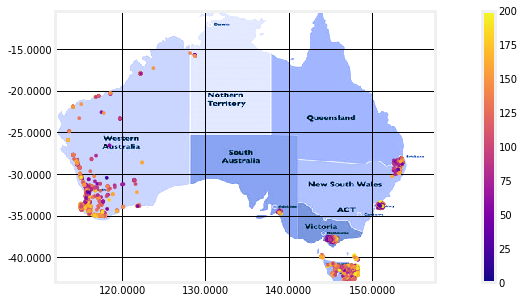

In [53]:
# First, we read the image and convert it into a numpy 2D array where each element represents a pixel...

# image_formats = [('PNG','*.png')]
# file_path_list = askopenfilenames(filetypes=image_formats, initialdir='/', title='Please select a picture to analyze')
# for file_path in file_path_list:
map_file = 'australia_map_states.png'
map_image = plt.imread(map_file)

# ...create a figure with an attached axes object for later plotting...

fig, ax = plt.subplots(figsize = (15, 5))

long_right = 157.5
long_left = 112
lat_top = -10.4
lat_bottom = -43

# ...and display the image on the axes. (the image is kinda pixelated, so maybe you can replace it with a better one)

ax.imshow(map_image, extent = (long_left, long_right, lat_bottom, lat_top))

# This is not bad, but the axis labels are wrong. Ideally, they should reflect the actual latitude/longitude. Let's change 
# that. (I got the latitude/longitude bounds by guesstimation, so they might be wrong. By doing this, you can directly plot
# a marker for each flat, as represented by a latitude/longitude pair.)

ax.axis(xmin = long_left, xmax = long_right, ymin = lat_bottom, ymax = lat_top)

# Better, but the axis labels still look weird. We should format them. (you can change the number of decimal places if you
# think 4 isn't enough)

formatter = ticker.FuncFormatter(lambda x, pos: '{:.4f}'.format(x))

ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

# A grid would be nice.

ax.grid(True, color = 'black')

# This looks more or less like a map now. You can plot whatever you want on it, but make sure to pass the axes object to 
# the plot function.

# Example, with random data:

# set (rough) boundaries for the island so there aren't too many things in the water

island_right = 157.5
island_left = 112
island_top = -10.4
island_bottom = -40

# simple helper function to return a point between four corners

def randomPoint(right, left, top, bottom):
    return (random.random() * (right - left) + left, random.random() * (top - bottom) + bottom)


data = df_listing_final[['longitude', 'latitude', 'price']]
# and plot!

this_scatter = ax.scatter('longitude', 'latitude', c = 'price', cmap = 'plasma', data = data, s = 10)

# lastly, I suppose if you want a legend + colourbar...


fig.colorbar(this_scatter, ax = ax)

# it doesn't look very good like this but I think it captures the concept well; just tweak the numbers as necessary